<a href="https://colab.research.google.com/github/nehaaggarwal6871/Digit-Classification/blob/master/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import numpy as np
from google.colab import drive
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!unzip gdrive/My\ Drive/ml_dataset/Image_captioning_Dataset.zip > /dev/null

replace Flicker8k_Dataset/1000268201_693b08cb0e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [40]:
img_path = '/content/Flicker8k_Dataset/101669240_b2d3e7f17b.jpg'

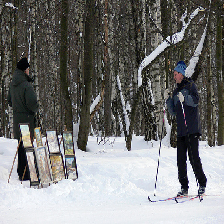

In [41]:
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
img

In [42]:
x = image.img_to_array(img)

In [43]:
x.shape
x = np.expand_dims(x, axis=0)

In [44]:
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

In [45]:
print(p)

[[('n04228054', 'ski', 0.9903921), ('n04229816', 'ski_mask', 0.0061871973), ('n03218198', 'dogsled', 0.001657381), ('n09193705', 'alp', 0.000843442), ('n04208210', 'shovel', 0.000613901)]]
